# Análisis de Iris Dataset

El dataset que se analizará a continuación contiene registros de muestras tomadas a 3 tipos diferentes de plantas, con su respectiva etiqueta.
Dichas plantas son:   
<img src="imagenes/flores.png" />

## 1. Importe de librerías

In [46]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

## 2. Preparación inicial

Se cargan los datos en memoria y se inicializan los datasets de train y tests necesarios para probar el modelo.

Etiquetas:
    0-Iris-setosa
    1-Iris-versicolor
    2-Iris-virginica
    Etiquetas del dataset [0 1 2] 

Conteo de etiquetas:  [35 35 35] [15 15 15]


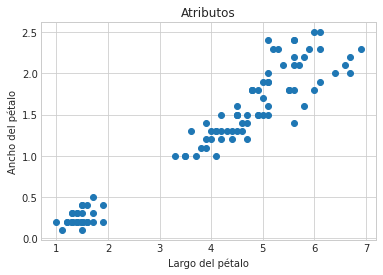

In [71]:
""" Carga de los datos de iris."""

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Etiquetas:\n\
    0-Iris-setosa\n\
    1-Iris-versicolor\n\
    2-Iris-virginica\n\
    Etiquetas del dataset', np.unique(y), '\n')

""" Separación en train y test.
    ---
    Hiperparámetros:
    Tamaño de test: 30%
    Semilla aleatoria: 1
    Estratificación activa"""

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

""" La estratificación se puede verificar con np.bincount"""
print('Conteo de etiquetas: ',np.bincount(y_train), np.bincount(y_test))
plt.title('Atributos')
plt.xlabel('Largo del pétalo')
plt.ylabel('Ancho del pétalo')
plt.scatter(X_train[: ,0], X_train[: ,1])
plt.show()

## 3. Normalización de los atributos

Para que los atributos sean comparables entre sí, es necesario transformar los valores a una escala estándar que permita comparar los atributos entre sí.
Para realizar esto, se usará el método StandarScaler, el cual retorna los valores con una media $ \mu $ igual a 0 y una varianza o desv. estándar $ \sigma $ igual a 1, de acuerdo a la siguiente fórmula:

$$
Z = \frac{x - u}{\sigma} \\
\mu = \frac {1}{N} \sum_{1}^{N} x_{i} \\
\sigma = \sqrt{\frac {1}{N}\sum_{1}^{N} (x_{i} - \mu)^2}
$$


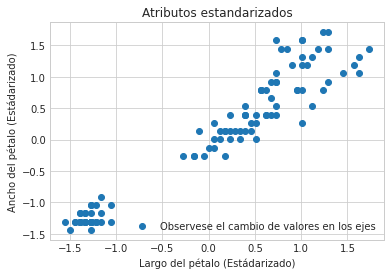

In [72]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
plt.title('Atributos estandarizados')
plt.xlabel('Largo del pétalo (Estándarizado)')
plt.ylabel('Ancho del pétalo (Estándarizado)')
plt.scatter(X_train_std[: ,0], X_train_std[: ,1])
plt.legend(['Observese el cambio de valores en los ejes'])
plt.show()